In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler 

In [2]:
#import the dataset
data = pd.read_csv('archive/fraudTrain.csv')
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
#target variable: is_fraud
print(data['is_fraud'].value_counts())
#data is extremely unbalanced as only 0.6% of instances are fraud

#splitting data into X and Y
X = data.drop(['is_fraud'], axis=1)
y = data['is_fraud']

#use random undersampling to decrease number of instances that aren't fraud
ss = 1
rus = RandomUnderSampler(sampling_strategy = ss)
X_res, y_res = rus.fit_resample(X, y)

print(len(X_res))
print(len(y_res))
#print(y_res)

reduced_df = X_res
reduced_df.insert(22,"is_fraud", y_res)
reduced_df

0    1289169
1       7506
Name: is_fraud, dtype: int64
15012
15012


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
639998,639998,2019-09-29 14:32:09,4961003488432306,fraud_Runte-Mohr,food_dining,4.12,Stacy,Walsh,F,324 Donna Ridge Suite 651,...,40.6284,-76.1950,1606,Ecologist,1966-05-10,ddde67a630c54ff74a3dd9e2bcd223ca,1348929129,39.678170,-75.319649,0
1150479,1150479,2020-04-24 22:59:41,5388659976630693,fraud_Kilback and Sons,entertainment,21.78,Charles,Preston,M,5364 William Harbor,...,43.2064,-90.9405,153,Quantity surveyor,1962-02-14,d29ff14d304a928e30d61f79968ee895,1366844381,43.430517,-91.908424,0
90312,90312,2019-02-23 06:37:19,344709867813900,"fraud_Wintheiser, Dietrich and Schimmel",misc_pos,7.48,Joanna,Hudson,F,2924 Bobby Trafficway,...,27.4703,-81.4872,50835,Environmental consultant,1986-01-30,5517044a4ad78e4636fc506d6a5b6b64,1329979039,26.910714,-82.112329,0
746911,746911,2019-11-16 01:18:12,4512828414983801773,fraud_Miller-Hauck,grocery_pos,98.95,Monica,Cohen,F,864 Reynolds Plains,...,39.8936,-79.7856,328,Tree surgeon,1983-07-25,d66c128c80565f4ffb77341e49b5067d,1353028692,39.516200,-79.915389,0
1100750,1100750,2020-04-02 21:39:24,4640395708703,fraud_Bauch-Blanda,entertainment,15.00,Melissa,Krause,F,67632 Martin Gateway,...,30.6576,-91.6264,1178,Community education officer,1951-06-13,74b3f95db57f387f1d321ba6dc9e1d72,1364938764,31.230527,-91.503819,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [4]:
import re
#split feature trans_date_trans_time into year, month, hour
year = []
month = []
hour = []
for val in reduced_df['trans_date_trans_time']:
    y = re.search(('(\d{4})'), val).group(1)
    m = re.search(('-(\d{2})-'), val).group(1)
    h = re.search((' (\d{2})'), val).group(1)
    year.append(y)
    month.append(m)
    hour.append(h)

#split dob into birth year (also translate into approximate age (2020 - birth year))
age = []
for val in reduced_df['dob']:
    by = re.search(('(\d{4})'), val).group(1)
    age.append(2020 - int(by))

#insert the separated data into reduced_df
reduced_df.insert(2, 'year', year)
reduced_df.insert(3, 'month', month)
reduced_df.insert(4, 'hour', hour)
reduced_df.insert(21, 'age', age)


#create dummies for the category and gender
dummies = ['gender', 'category', 'state']
dummy_data = pd.get_dummies(reduced_df[dummies])
reduced_df = pd.concat([reduced_df, dummy_data], axis = 1)
reduced_df.drop(dummies, axis=1, inplace=True)

In [5]:
#Separate numerical and categorical features
#numerical: cc_num, amt, lat, long, city_pop, unix_time, merch_lat, merch_long
#categorical: trans_date_trans_time, merchant, category, first, last, gender, street, job, dob, trans_num
#num_Feat = ['cc_num', 'year', 'month', 'hour', 'amt', 'lat', 'long', 'city_pop', 'age', 'unix_time', 'merch_lat', 'merch_long']
#cat_Feat = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'job', 'dob', 'trans_num']

#features that might be relavent to detecting credit card fraud
rel_Num_Feat = [ 'year', 'month', 'hour', 'amt', 'city_pop', 'age', 'merch_lat', 'merch_long']
rel_Cat_Feat = ['merchant', 'category', 'gender', 'job']


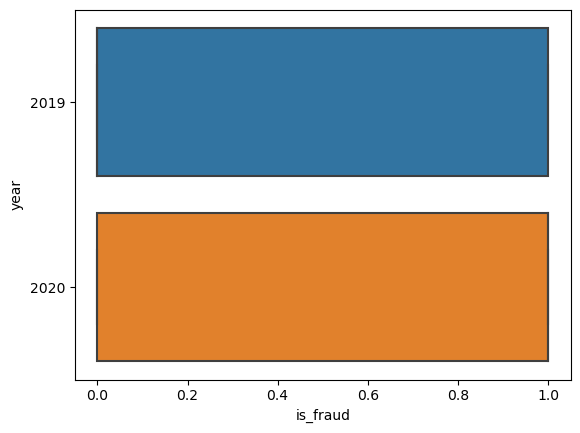

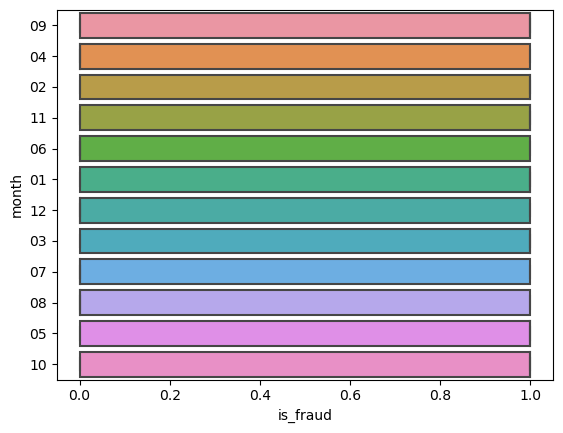

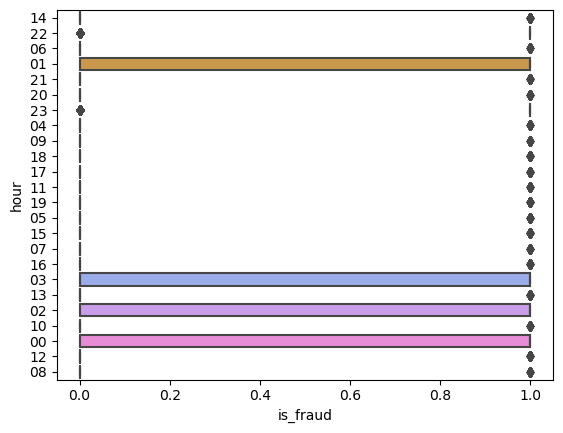

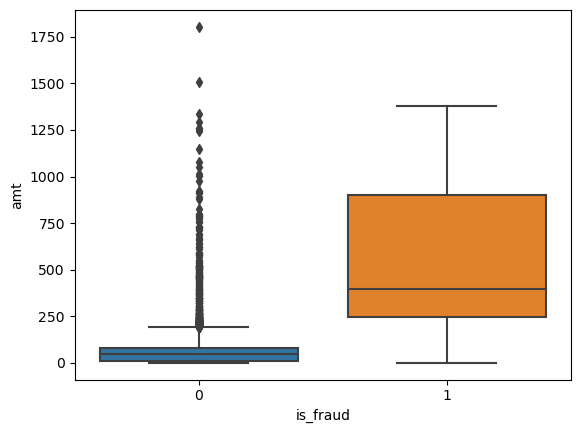

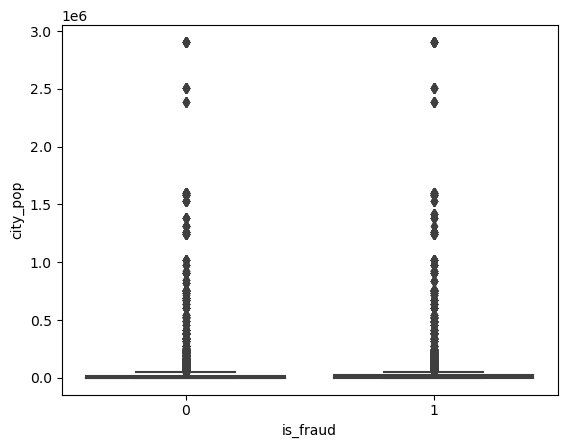

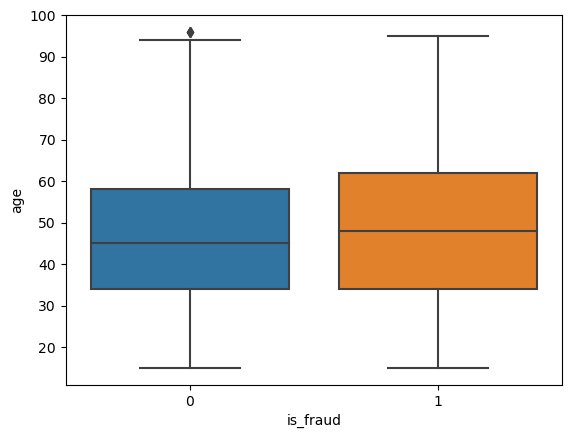

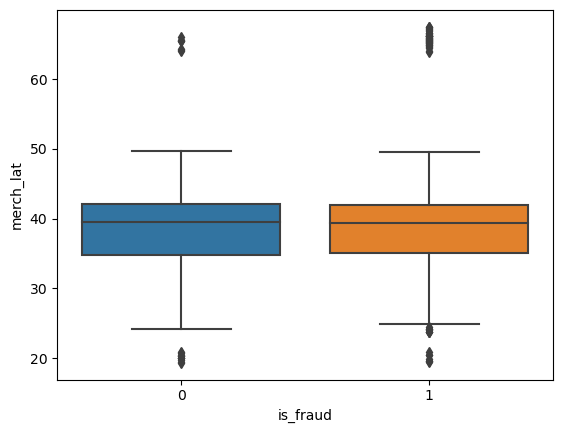

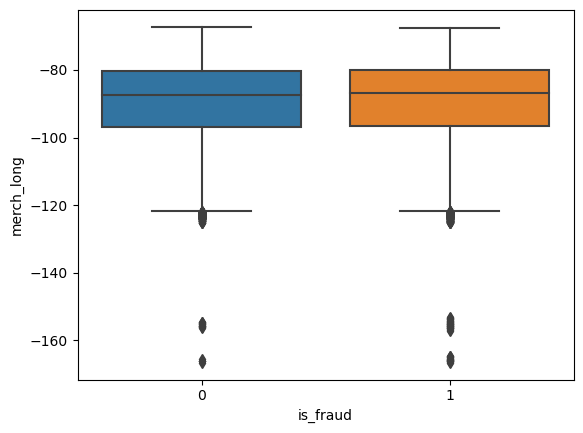

In [32]:
#find features that may contribute to fraudulent transactions

for col in rel_Num_Feat:
    ax = sns.boxplot(data=reduced_df, x='is_fraud', y=col)
    plt.show()

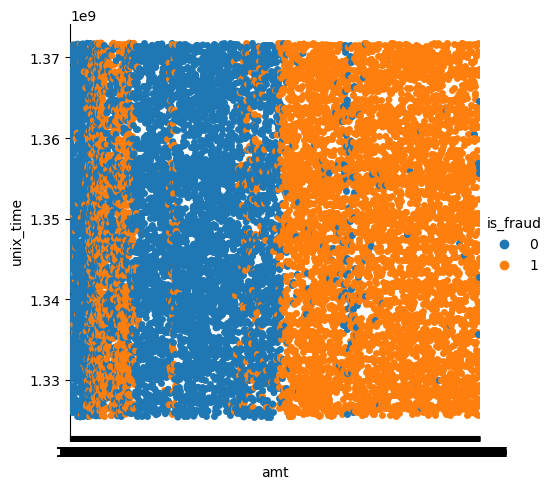

In [7]:
#plot categorical scatterplots against is_fraud
sns.catplot(data=reduced_df, x='amt', y='unix_time', hue = 'is_fraud')

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
#bring in test data
test_data = pd.read_csv('archive/fraudTest.csv')

#split feature trans_date_trans_time into year, month, hour
year = []
month = []
hour = []
for val in test_data['trans_date_trans_time']:
    y = re.search(('(\d{4})'), val).group(1)
    m = re.search(('-(\d{2})-'), val).group(1)
    h = re.search((' (\d{2})'), val).group(1)
    year.append(y)
    month.append(m)
    hour.append(h)

#split dob into birth year (also translate into approximate age (2020 - birth year))
age = []
for val in test_data['dob']:
    by = re.search(('(\d{4})'), val).group(1)
    age.append(2020 - int(by))


#insert the separated data into reduced_df
test_data.insert(2, 'year', year)
test_data.insert(3, 'month', month)
test_data.insert(4, 'hour', hour)
test_data.insert(21, 'age', age)


#create dummies for the category and gender
dummies = ['gender', 'category', 'state']
dummy_data = pd.get_dummies(test_data[dummies])
test_data = pd.concat([test_data, dummy_data], axis = 1)
test_data.drop(dummies, axis=1, inplace=True)

In [33]:
dropList = ['trans_date_trans_time','job', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'dob', 'trans_num', 'unix_time']
new_reduced_df = reduced_df.drop(dropList, axis=1)
new_reduced_test_data = test_data.drop(dropList, axis=1)

new_reduced_test_data.insert(34, 'state_DE', 0, True)

X = new_reduced_df.iloc[:,:-1]

y = new_reduced_df['is_fraud']

X_test = new_reduced_test_data.iloc[:,:-1]

y_test = new_reduced_test_data['is_fraud']

#print(new_reduced_df['state_DE'].value_counts())
#print(new_reduced_test_data['state_DE'].value_counts())

log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9430665498210427
[[522467    532]
 [ 31107   1613]]
